In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
stats = pd.read_csv('NYPD_Complaint_Data_Historic.csv', low_memory=False)

In [11]:
stats.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [ ]:
g= sns.FacetGrid(stats, row='BORO_NM',col='OFNS_DESC', hue='BORO_NM')
g =g.map(plt.scatter,'KY_CD','PD_CD')


In [ ]:
n = plt.hist(stats.ADDR_PCT_CD, bins=30)

C:\Users\jayma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6721: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\jayma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6722: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import datetime
from datetime import date
import math
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.metrics import mean_squared_error
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import preprocessing
from random import sample 

sns.set(rc={'figure.figsize':(12,10)})
sns.set(style="white", context="talk")

%matplotlib inline

In [6]:
stats.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12-31-2015,23:45:00,NaN,NaN,12-31-2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,N.Y. POLICE DEPT,BRONX,44,INSIDE,BAR/NIGHT CLUB,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12-31-2015,23:36:00,NaN,NaN,12-31-2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,N.Y. POLICE DEPT,QUEENS,103,OUTSIDE,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12-31-2015,23:30:00,NaN,NaN,12-31-2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,N.Y. POLICE DEPT,MANHATTAN,28,NaN,OTHER,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12-31-2015,23:30:00,NaN,NaN,12-31-2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,N.Y. POLICE DEPT,QUEENS,105,INSIDE,RESIDENCE-HOUSE,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12-31-2015,23:25:00,12-31-2015,23:30:00,12-31-2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,N.Y. POLICE DEPT,MANHATTAN,13,FRONT OF,OTHER,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


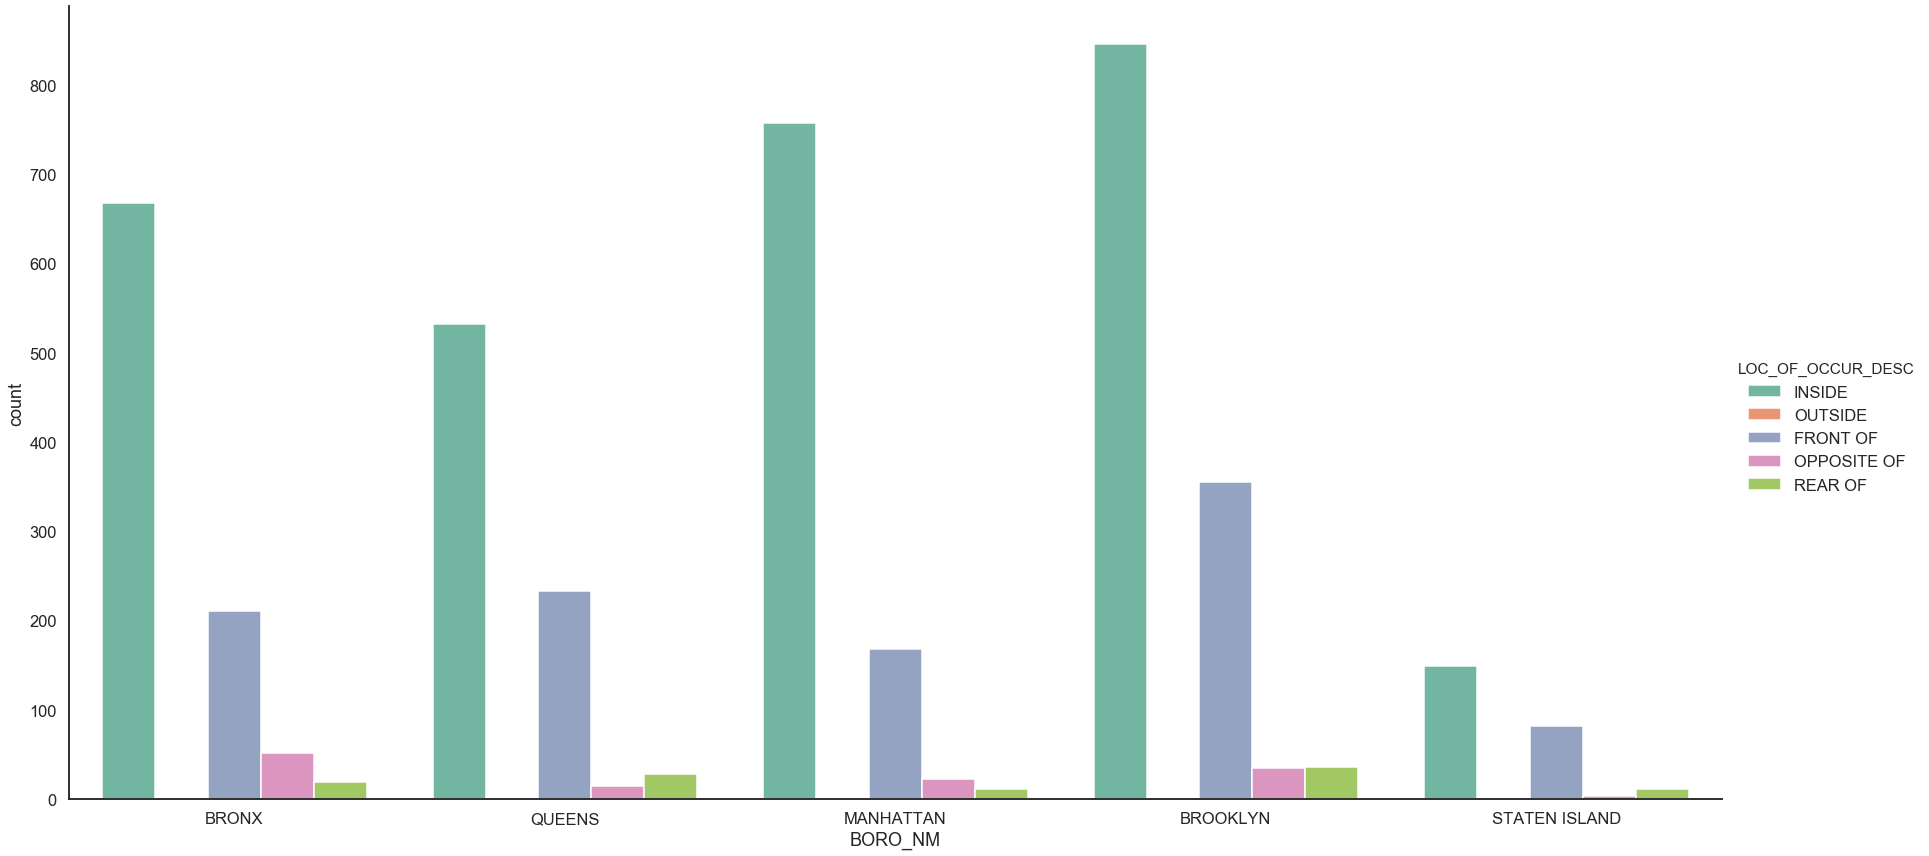

In [9]:
sns.catplot(x="BORO_NM", kind="count",hue="LOC_OF_OCCUR_DESC",palette="Set2", data=stats,height=12, aspect = 2);

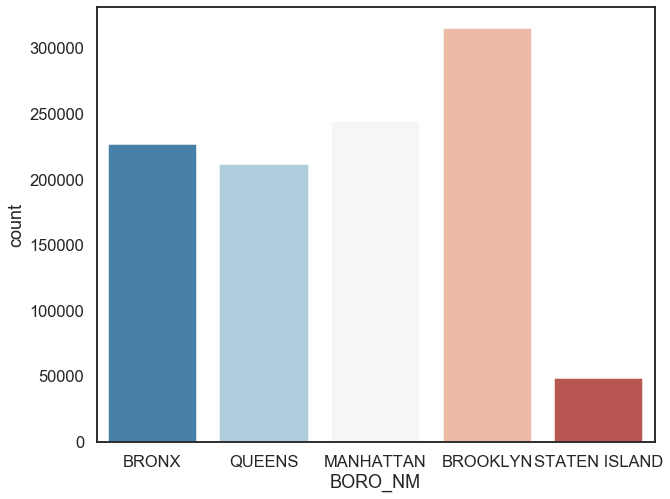

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="BORO_NM", data=stats, palette="RdBu_r");

In [18]:
stats.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
dtype: int64

In [37]:
stats.loc[stats['PD_DESC'].isnull(),'PD_DESC']=0

In [36]:
stats.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           0
CMPLNT_FR_TM           0
CMPLNT_TO_DT           0
CMPLNT_TO_TM           0
RPT_DT                 0
KY_CD                  0
OFNS_DESC              0
PD_CD                  0
PD_DESC              733
CRM_ATPT_CPTD_CD       1
LAW_CAT_CD             0
JURIS_DESC             0
BORO_NM                0
ADDR_PCT_CD            1
LOC_OF_OCCUR_DESC      0
PREM_TYP_DESC          0
PARKS_NM               0
HADEVELOPT             0
X_COORD_CD             0
Y_COORD_CD             0
Latitude               0
Longitude              0
Lat_Lon                0
dtype: int64

In [42]:
positions = list(zip(stats['Latitude'], stats['Longitude']))
tiles = 'Stamen Terrain'
fol = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)
pos_samp = sample(positions, 22000)#22K is the max now as we join both DS togather 
HeatMap(pos_samp, radius = 8).add_to(fol) 
fol